In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Importing necesary packages

In [9]:
#Importing necesary packages
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random

# Load the training and testing data

In [10]:
#Load the traiming and testing data
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

# Defining network architecture using Keras

In [11]:
#Defining network architecture using Keras
import keras 
model= Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

# Training model using SGD

In [12]:
#Training model using SGD
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5


2023-10-12 10:34:26.488893: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6527 - accuracy: 0.8324 - val_loss: 0.3537 - val_accuracy: 0.9047
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3333 - accuracy: 0.9062 - val_loss: 0.2864 - val_accuracy: 0.9202
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9201 - val_loss: 0.2545 - val_accuracy: 0.9287
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2525 - accuracy: 0.9286 - val_loss: 0.2323 - val_accuracy: 0.9360
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2293 - accuracy: 0.9355 - val_loss: 0.2138 - val_accuracy: 0.9379


# Evaluating the network

In [13]:
#Evaluating the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2138 - accuracy: 0.9379
Loss=0.214
Accuracy=0.938


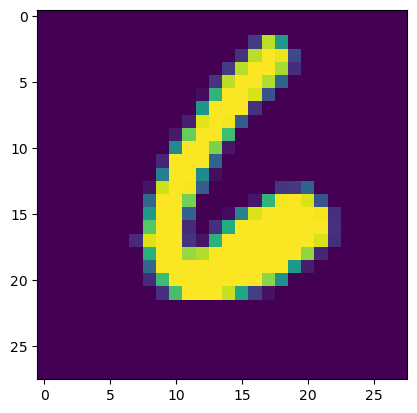

313/313 [==============================] - 0s 972us/step
The Handwritten number in the image is 6


In [14]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
prediction=model.predict(x_test)
print("The Handwritten number in the image is %d" % np.argmax(prediction[n]))

# Plot training loss and accuracy

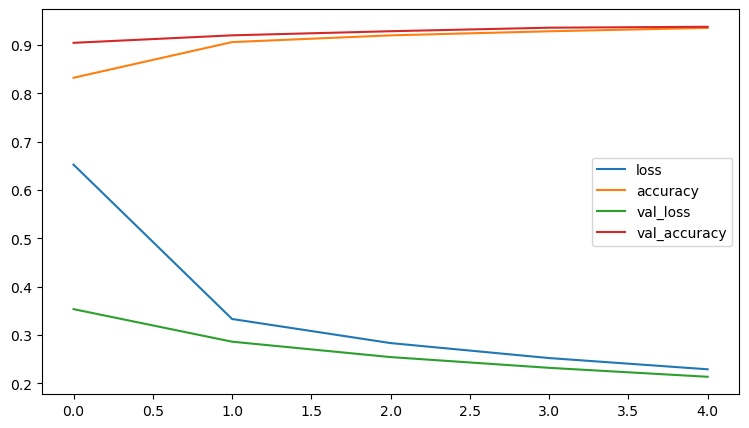

In [15]:
#Plot training loss and accuracy
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.show()

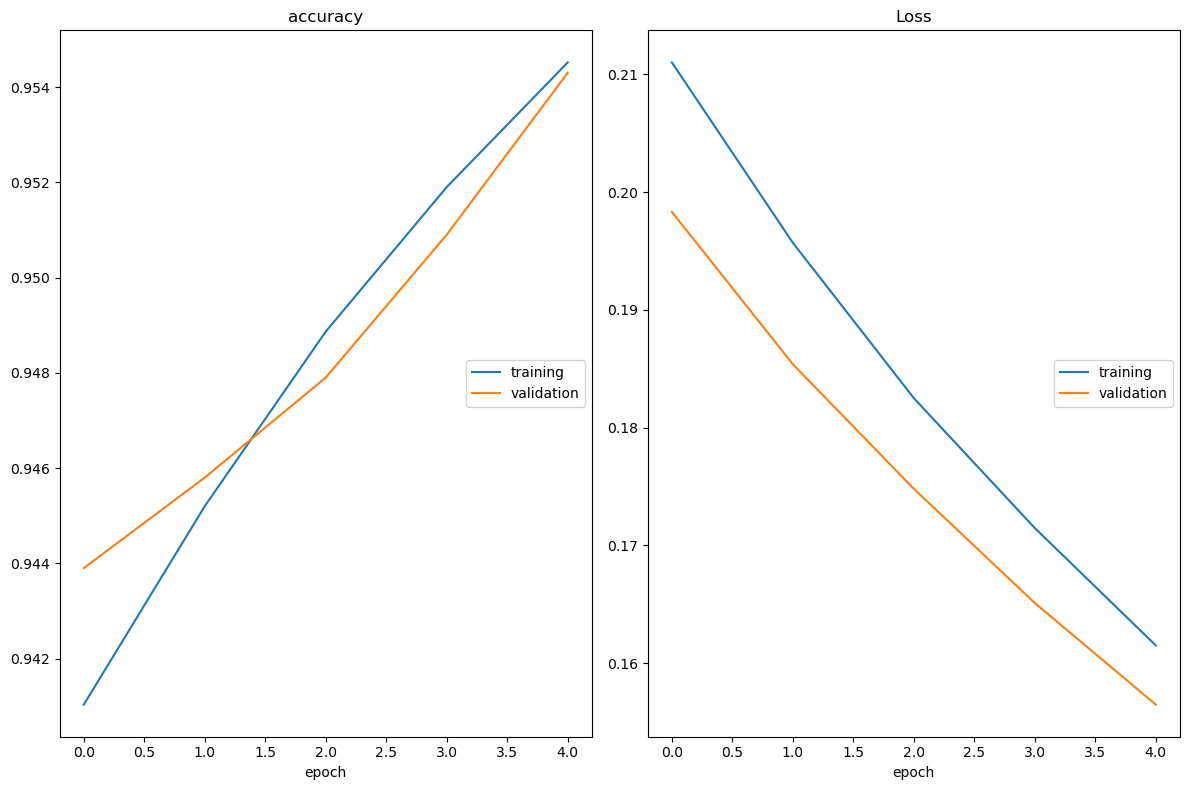

accuracy
	training         	 (min:    0.941, max:    0.955, cur:    0.955)
	validation       	 (min:    0.944, max:    0.954, cur:    0.954)
Loss
	training         	 (min:    0.162, max:    0.211, cur:    0.162)
	validation       	 (min:    0.156, max:    0.198, cur:    0.156)


In [16]:
#Plotting using keras
!pip install livelossplot
from livelossplot import PlotLossesKeras
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,callbacks=[PlotLossesKeras()],verbose=0)